## **Beta Calculations**

### **Importing Libraries**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### **Initial Parameters**

In [14]:
beta = 0.8      # particle velocity
L = 600         # length
c = 30          # speed of light in units of nanometers per second
T = L/(beta*c)  # calulcation of time

In [15]:
# creating a momentum interval for calculations and simulation
ps = np.linspace(0.1, 5, 1000)

mpi = 0.139     # mass of pion particle (GeV)
mK = 0.494      # mass of kaon particle (GeV)
mp = 0.938      # mass of proton (GeV)
me = 0.000511   # mass of electron (GeV)

# calculating velocity for each respective particle
betapi = ps/np.sqrt(ps**2 + mpi**2)
betak = ps/np.sqrt(ps**2 + mK**2)
betap = ps/np.sqrt(ps**2 + mp**2)
beta_e = ps/np.sqrt(ps**2 + me**2)

### **Error Propagation Calculations**

In [16]:
# taking the derivations for all expressions 
# to include error in calculations and simulation

dT = 0.1

# the second partial derivative is calculated for each variable
# that is not invariant. In this case it is time.

dbetapi = betapi*(dT/T)
dbetapi2 = betapi*(3*dT/T)

dbetaK = betak*(dT/T)
dbetaK2 = betak*(3*dT/T)

dbetap = betap*(dT/T)
dbetap2 = betap*(3*dT/T)

dbeta_e = beta_e*(dT/T)
dbeta_e2 = beta_e*(3*dT/T)

In [17]:
dps = 0.01*ps

dbeta = (beta*dT)/T

newps = np.random.normal(ps, dps)

newbeta_pi = np.random.normal(betapi, dbetapi2)

newbeta_k = np.random.normal(betak, dbetaK2)

newbeta_p = np.random.normal(betap, dbetap2)

newbeta_e = np.random.normal(beta_e, dbeta_e2)

### **Plotting theoretical lines**

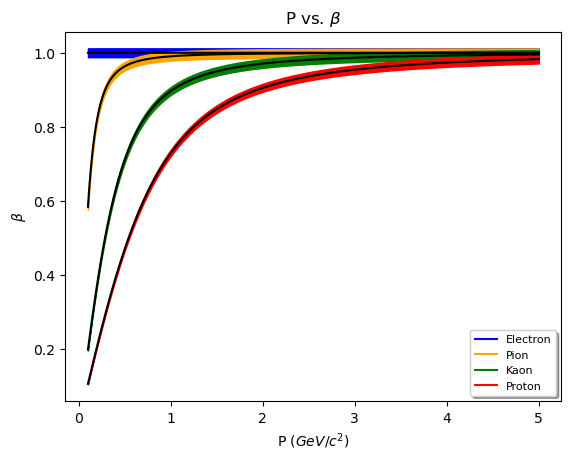

In [18]:
plt.figure()

plt.plot(ps, betapi, color ='black')
plt.plot(ps, betak, color ='black')
plt.plot(ps, betap, color ='black')
plt.plot(ps, beta_e, color ='black')
plt.title(r'P vs. $\beta$')
plt.xlabel(r'P $(GeV/c^2)$')
plt.ylabel(r'$\beta$')

plt.fill_between(ps, beta_e-dbeta_e2, beta_e+dbeta_e2, color = 'blue')
plt.fill_between(ps, betapi-dbetapi2, betapi+dbetapi2, color = 'orange')
plt.fill_between(ps, betak-dbetaK2, betak+dbetaK2, color = 'green')
plt.fill_between(ps, betap-dbetap2, betap+dbetap2, color = 'red')

legend = [Line2D([0], [0], color='blue', label='Electron'),
          Line2D([0], [0], color='orange', label='Pion'),
          Line2D([0], [0], color='green', label='Kaon'),
          Line2D([0], [0], color='red', label='Proton')]

plt.legend(handles=legend, loc='lower right', fontsize=8, fancybox=True, shadow=True)


### **Finding the Upper Limits of Kaon and Pion**

In [19]:
kaon_upper_limit = np.mean(betak+dbetaK2)
pion_upper_limit = np.mean(betapi+dbetapi2)

print("Upper limit of Kaon: ", kaon_upper_limit)
print("Upper limit of Pion: ", pion_upper_limit)

Upper limit of Kaon:  0.9332549535667849
Upper limit of Pion:  0.9974890373562417


### **FInding the Timing Resolution for Kaon and Pion**

In [25]:
new_dT = np.mean((dbetapi2*T)/beta)
new_dT2 = np.mean((dbetaK2*T/beta))

In [26]:
print("Timing Resolution for Kaon: ", new_dT2)

Timing Resolution for Kaon:  0.3458207584857158


In [27]:
print("Timing Resolution for Pion: ", new_dT)

Timing Resolution for Pion:  0.36962291404010944


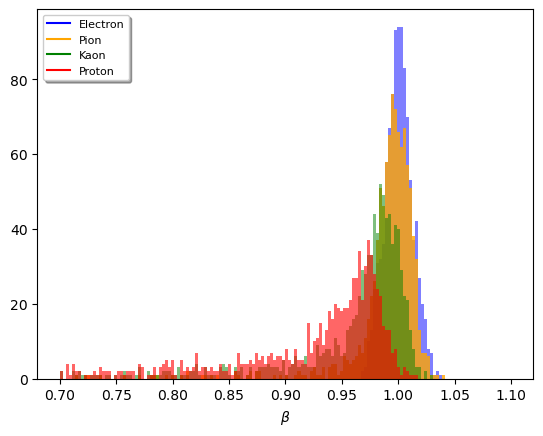

In [24]:
plt.figure()
electron = plt.hist(newbeta_e, alpha = 0.5, histtype='stepfilled', bins = 150, range = [0.7, 1.1], color='blue')
pion = plt.hist(newbeta_pi, alpha = 0.8, histtype='stepfilled', bins = 150, range=[0.7, 1.1], color='orange')
kaon = plt.hist(newbeta_k, alpha = 0.5, histtype='stepfilled', bins = 150, range = [0.7, 1.1], color='green')
proton = plt.hist(newbeta_p, alpha = 0.6, histtype='stepfilled', bins = 150, range = [0.7, 1.1], color='red')
plt.xlabel(r'$\beta$')

plt.legend(handles=legend, loc='upper left', fontsize=8, fancybox=True, shadow=True)